In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
path_data = './data2/'

In [2]:
train = torchvision.datasets.CIFAR10(root = path_data, train=True, download = True)

HBox(children=(FloatProgress(value=1.0, bar_style='info', max=1.0), HTML(value='')))

Extracting ./data2/cifar-10-python.tar.gz to ./data2/


In [4]:
test = torchvision.datasets.CIFAR10(root=path_data, train = False, download = True)

Files already downloaded and verified


In [5]:
type(train)

torchvision.datasets.cifar.CIFAR10

In [6]:
cifar_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

In [7]:
train.transform = cifar_transform
test.transform = cifar_transform
train.transforms = torchvision.datasets.vision.StandardTransform(cifar_transform)
test.transforms = torchvision.datasets.vision.StandardTransform(cifar_transform)

In [8]:
print(train.transform)
print('\n######\n')
print(train.transforms)

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

######

StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [9]:
trainloader = torch.utils.data.DataLoader(train, batch_size=4,
                                         shuffle=True, num_workers = 2)
testloader = torch.utils.data.DataLoader(train, batch_size = 4,
                                        shuffle = False, num_workers = 2)

In [15]:
train_iter = iter(trainloader)
images, labels = train_iter.next()

print(images[0])

tensor([[[1.0000, 0.9922, 0.9843,  ..., 0.7412, 1.0000, 0.9843],
         [1.0000, 0.9843, 0.9765,  ..., 0.7255, 0.9922, 0.9843],
         [1.0000, 0.9922, 0.9922,  ..., 0.7412, 1.0000, 0.9922],
         ...,
         [1.0000, 0.9843, 0.9843,  ..., 0.8196, 0.9294, 0.8902],
         [1.0000, 0.9765, 0.9765,  ..., 0.8196, 0.8667, 0.8039],
         [1.0000, 0.9843, 0.9765,  ..., 0.8510, 0.8745, 0.8196]],

        [[1.0000, 0.9686, 0.9451,  ..., 0.6941, 0.9922, 0.9843],
         [1.0000, 0.9686, 0.9451,  ..., 0.6863, 0.9922, 0.9843],
         [1.0000, 0.9843, 0.9608,  ..., 0.7020, 1.0000, 0.9922],
         ...,
         [1.0000, 0.9922, 0.9922,  ..., 0.7961, 0.9294, 0.8902],
         [1.0000, 0.9843, 0.9843,  ..., 0.7961, 0.8667, 0.8039],
         [1.0000, 0.9843, 0.9843,  ..., 0.8118, 0.8745, 0.8196]],

        [[1.0000, 0.9922, 0.9216,  ..., 0.6627, 0.9922, 0.9922],
         [1.0000, 0.9843, 0.9137,  ..., 0.6549, 0.9922, 0.9843],
         [1.0000, 1.0000, 0.9294,  ..., 0.6627, 1.0000, 0.

 frog horse horse truck


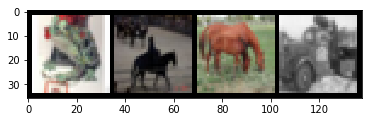

In [20]:
def plot_images(images, labels):
    img_grid = torchvision.utils.make_grid(images, nrow = 4, normalize = True)
    np_img= img_grid.numpy().transpose(1,2,0)
    plt.imshow(np_img)

d_class2idx = train.class_to_idx
d_idx2class = dict(zip(d_class2idx.values(), d_class2idx.keys()))

images_labels = train_iter.next()
plot_images(images, labels)
print(' '.join('%5s' %d_idx2class[int(labels[j])]for j in range(len(images))))